# Домашнее задание
## Задание 1
Реализуйте алгоритм K ближайших соседей для классификации. 
- Создайте искуственный набор данных из 100 наблюдений с 3 классами.
- Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
- Используйте евклидову меру
- Если возникает неопределенность (например, все три соседа имеют разные метки классов), то присвойте класс случайным образом
- Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
- Постройте разделяющие поверхности классификатора

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

# Решение:

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from math import sqrt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

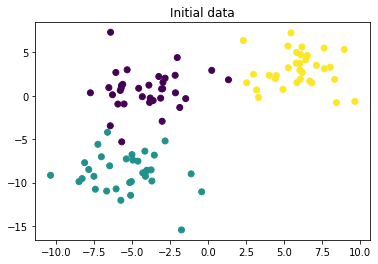

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [7]:
X_train = X[:70]
y_train = Y[:70]
X_test = X[70:]
y_test = Y[70:]

In [8]:
def euclidean_distance(x0, x1):
    return sqrt(np.sum((x0 - x1) ** 2)) 

In [9]:
def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_pred)

In [10]:
def kNN(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        counter = Counter(y_train[distances.argsort()[:k]])
        prediction = counter.most_common()[0][0]
        pred_labels.append(prediction)    
    return pred_labels

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                   random_state=42)

In [12]:
def draw_class_border(clf, X, Y, k, h=.05, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
  y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  plt.title(f"k = {k}")
  plt.show()

Predicted labels with 1 neighbors: [2 2 1 0 1 1 0 0 0 0 0 2 1 0 1 1 1 1 0 1 1 2 2 0 2]
Accuracy score with 1 neighbors is 0.96


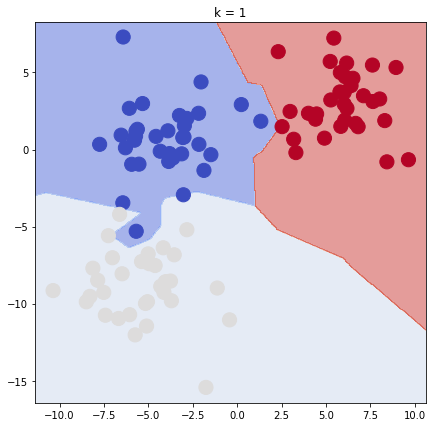

Predicted labels with 3 neighbors: [2 2 1 0 1 1 0 0 0 0 0 2 1 0 0 1 1 1 0 1 1 2 2 0 2]
Accuracy score with 3 neighbors is 1.0


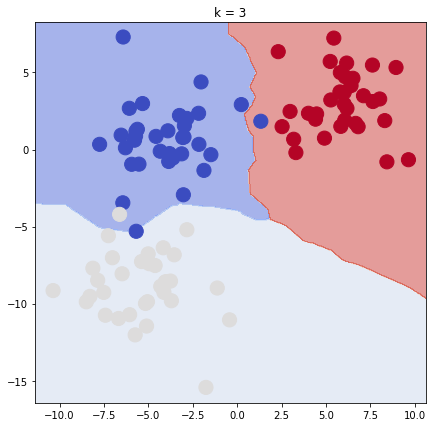

Predicted labels with 5 neighbors: [2 2 1 0 1 1 0 0 0 0 0 2 1 0 0 1 1 1 0 1 1 2 2 0 2]
Accuracy score with 5 neighbors is 1.0


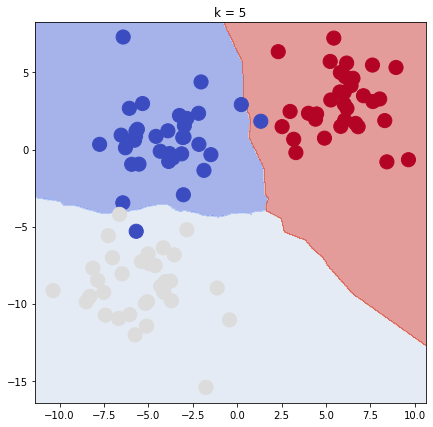

Predicted labels with 7 neighbors: [2 2 1 0 1 1 0 0 0 0 0 2 1 0 0 1 1 1 0 1 1 2 2 0 2]
Accuracy score with 7 neighbors is 1.0


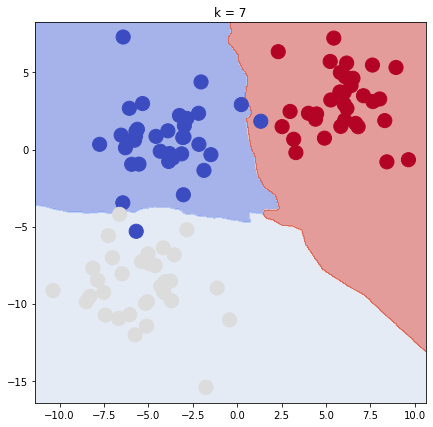

Predicted labels with 9 neighbors: [2 2 1 0 1 1 0 0 0 0 0 2 1 0 0 1 1 1 0 1 1 2 2 0 2]
Accuracy score with 9 neighbors is 1.0


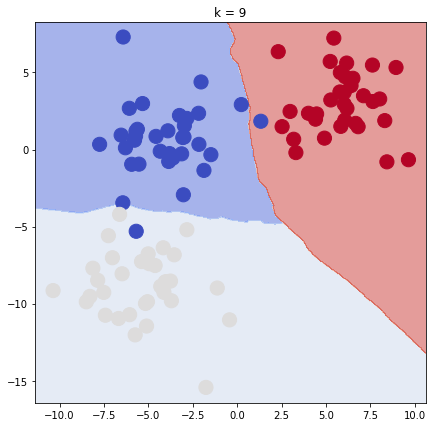

In [17]:
ks = [1, 3, 5, 7, 9]

for k in ks:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)

  y_pred = clf.predict(x_test)
  print(f"Predicted labels with {k} neighbors: {y_pred}")
  print(f"Accuracy score with {k} neighbors is {accuracy(y_pred, y_test)}")

  draw_class_border(clf, X, Y, k)

## Задание 2
Реализуйте алгоритм K ближайших соседей для регрессии. 
- создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 15 случайных точек как тренировочную выборку. 
- предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.
- постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения $k$.
$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

## Решение:

In [18]:
x = np.arange(0, 5, 0.2)
y = np.sin(x)
len(x)

25

In [19]:
np.random.seed(4)

In [20]:
x_train = np.random.choice(x, size=15)
y_train = np.sin(x_train)

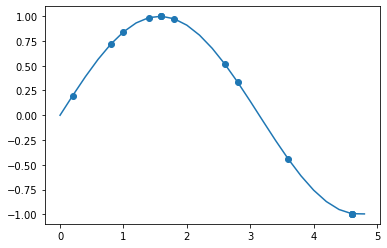

In [21]:
plt.plot(x, y)
plt.scatter(x_train, y_train);

In [22]:
def kNN_regressor(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        prediction = np.mean(y_train[distances.argsort()[:k]])
        pred_labels.append(prediction)    
    return pred_labels

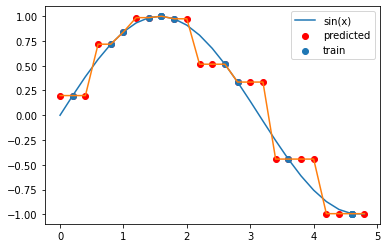

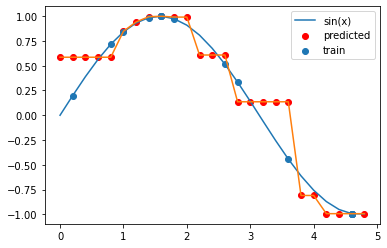

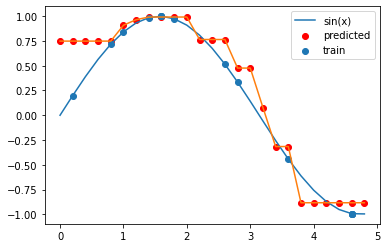

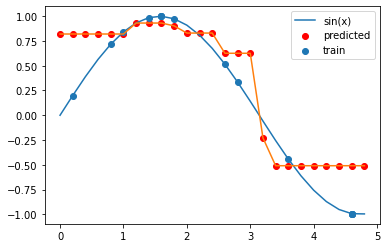

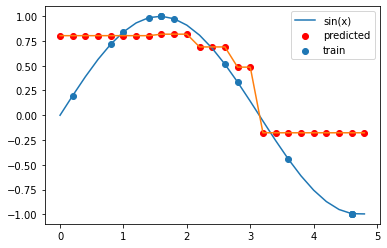

In [23]:
for k in range(1, 11, 2):
    y_pred = kNN_regressor(x_train, y_train, x, k)
    plt.plot(x, y, label='sin(x)')
    plt.plot(x, y_pred)
    
    plt.scatter(x, y_pred, label='predicted', c='red')
    plt.scatter(x_train, y_train, label='train')
    
    plt.legend()
    plt.show()